In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace = True)

In [4]:
df.columns = ['label','data']

In [5]:
# create binary labels
df['b_labels'] = df['label'].map({'ham': 0, 'spam': 1})
y = df['b_labels'].as_matrix()

C:\Users\Ramachandran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


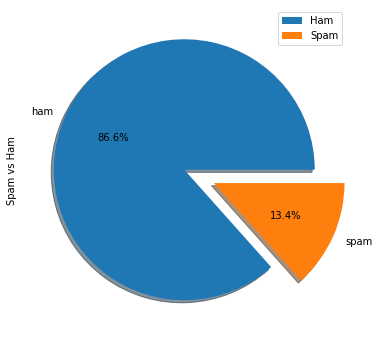

In [6]:
df["label"].value_counts().plot(kind = 'pie', explode = [0, 0.25], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [7]:
count_vectorizer = CountVectorizer(decode_error= 'ignore')
X = count_vectorizer.fit_transform(df['data'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)
print("Train score: ", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score:  0.995981784087865
Test score:  0.977705274605764


In [10]:
df['predictions'] = model.predict(X)

In [11]:
from sklearn import metrics

metrics.precision_score(y_test, model.predict(X_test))

0.9147286821705426

In [12]:
# Here the precision score is not good, therefore it might have false positives. 
# Our objective is to minimize FP rate rather than aiming for better accuracy

In [13]:
# things that should be spam

sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
More people are doggi

In [14]:
# things that should not be spam

sneaky_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in sneaky_spam:
    print(msg)

Hey company elama po mudyadhu.
Gibbs unsold.mike hussey
Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctargg. Ctagg. ie you
Ryder unsold.now gibbs.
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
S..antha num corrct dane
Ambrith..madurai..met u in arun dha marrge..remembr?
I know complain num only..bettr directly go to bsnl offc nd apply for it..
Mostly sports type..lyk footbl,crckt..
\CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN HUNNY R UIN WK SAT?SOUNDåÕS LIKEYOUR HAVIN GR8FUN J! KEEP UPDAT COUNTINLOTS OF LOVEME XXXXX.\""
Raviyog Peripherals bhayandar east
Brainless Baby Doll..:-D;-), vehicle sariyag drive madoke barolla..
Cps is causing the outages to conserve energy.
Unlimited texts. Limited minutes.
Playin space poker, u?
Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.
Mathews or tait or edwards or anderson
Urgh, coach hot, smells of chip fat! Thanks again, es

##### Now we shall try the same classification using TF-IDF vectorizer 

In [15]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['data'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [17]:
model = MultinomialNB()
model.fit(X_train, y_train)
print("Train score: ", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score:  0.9635681757299759
Test score:  0.9564980967917346


In [18]:
df['predictions'] = model.predict(X)

In [19]:
from sklearn import metrics

metrics.precision_score(y_test, model.predict(X_test))

1.0

Here we got the precision score as 1 which means there are no false positives in the predicition.

In [20]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords = list(stopwords)

In [21]:
spam_msgs = df[df['predictions']==1]['data']
ham_msgs  = df[df['predictions']==0]['data']

In [22]:
spam_words = []
ham_words  = []

In [23]:
for sent in spam_msgs:
    sent = sent.lower()
    sent = nltk.tokenize.word_tokenize(sent)
    sent = [t for t in sent if len(t)>2]
    sent = [t for t in sent if t not in stopwords]
    sent = [t for t in sent if not any(c.isdigit() for c in t)]
    for word in sent:
        if word not in spam_words:
            spam_words.append(word)
        

In [24]:
for sent in ham_msgs:
    sent = sent.lower()
    sent = nltk.tokenize.word_tokenize(sent)
    sent = [t for t in sent if len(t)>2]
    sent = [t for t in sent if t not in stopwords]
    sent = [t for t in sent if not any(c.isdigit() for c in t)]
    for word in sent:
        if word not in ham_words:
            ham_words.append(word)

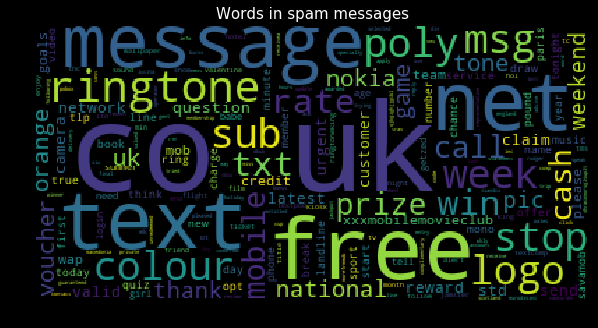

In [25]:
from wordcloud import WordCloud
spam_string=(" ").join(spam_words)
wc=WordCloud()
wc.generate(str(spam_string))
plt.figure(figsize=(10,10),facecolor='k')
plt.title('Words in spam messages',fontsize=15,color='white')
plt.imshow(wc)
plt.show()

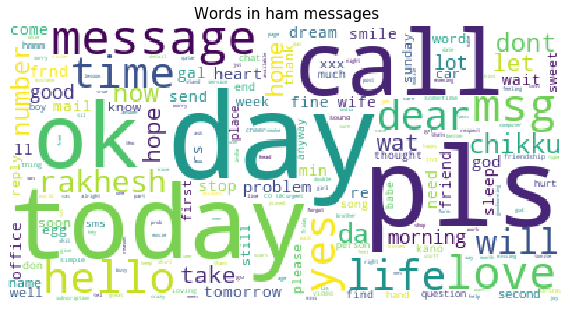

In [26]:
from wordcloud import WordCloud
ham_string=(" ").join(ham_words)
wc=WordCloud(background_color='white')
wc.generate(str(ham_string))
plt.figure(figsize=(10,10),facecolor='w')
plt.axis('off')
plt.title('Words in ham messages',fontsize=15,color='black')
plt.imshow(wc)
plt.show()